In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('cleand_skytrax_reviews.csv')
df.head()

,Date,Seat Type,Rating,Text,Year,Month,Day of Month,Day of Week,Text Length
0,2024-08-30,Business,8,sound food drink offered straightforward check...,2024,August,30,Friday,332
1,2024-08-28,Business,1,beyond appalled hurt frustrated beyond upset d...,2024,August,28,Wednesday,1605
2,2024-08-28,Business,1,experience overall poor purchased round trip d...,2024,August,28,Wednesday,683
3,2024-08-27,Business,1,entire travel cancelled booked two business cl...,2024,August,27,Tuesday,216
4,2024-08-26,Business,9,service offered exceptional although four flig...,2024,August,26,Monday,272


In [4]:
df.describe()

,Rating,Year,Day of Month,Text Length
count,3000.000000,3000.000000,3000.000000,3000.00000
mean,4.360333,2018.339000,15.908000,608.73900
std,3.120642,2.727983,8.793785,375.13271
min,1.000000,2015.000000,1.000000,81.00000
25%,1.000000,2016.000000,8.000000,341.00000
50%,3.000000,2017.000000,16.000000,519.00000
75%,7.000000,2020.000000,23.000000,758.75000
max,10.000000,2024.000000,31.000000,2439.00000


<h4><b>Univariate Analysis</b></h4>

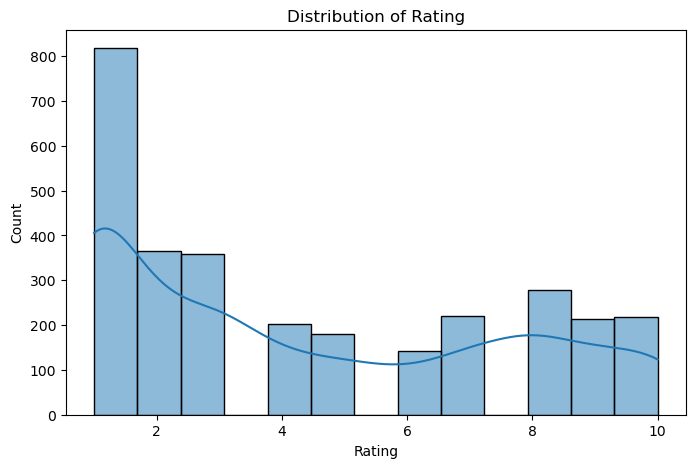

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of Rating')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>
<p>The distribution appears somewhat bimodal, with one peak at the very low end (rating 1) and a smaller peak around ratings 8 or 9. This pattern might indicate polarized user experiences—some users are extremely dissatisfied, while a smaller group is quite satisfied.</p>

<ul>
<li>
The data indicates a high level of dissatisfaction among users, with the most common rating being 1</li>
<li>
However, there is a smaller but noticeable group of users who are satisfied, giving ratings of 8 or higher. </li>
<li>
The distribution suggests a significant variance in user experiences, possibly indicating inconsistencies in service or product quality.</li>
</ul>

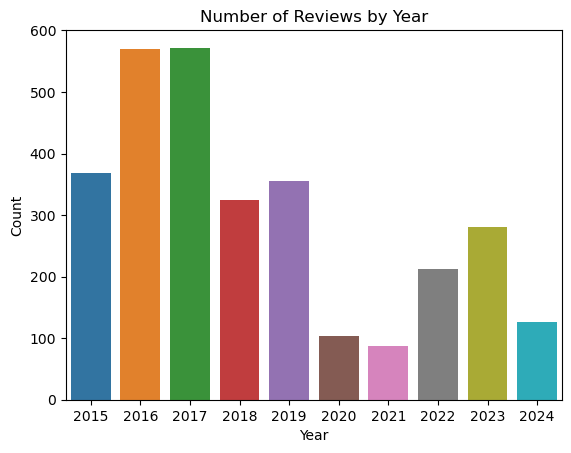

In [7]:
# Frequency by Year
sns.countplot(data=df, x='Year')
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
The data shows a fluctuating pattern in the number of reviews over the years, with a peak in 2016-2017</li>
<li>
 A significant decline during 2020-2021 likely due to external disruptions, and a gradual recovery in subsequent years.</li>
<li>
The decline in 2024 suggests a possible new trend or an incomplete data year.</li>
</ul>

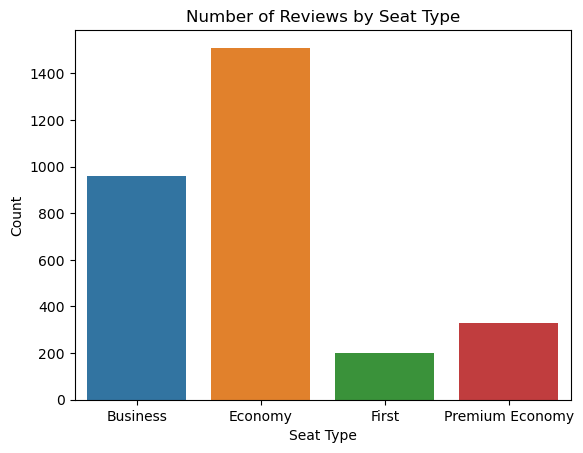

In [8]:
sns.countplot(data=df, x='Seat Type')
plt.title('Number of Reviews by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
Economy class dominates likely due to its affordability and accessibility for most travelers.</li>
<li>
Business class has the second highest number of reviews, indicating that a substantial number of passengers are opting for Business class, potentially for its enhanced comfort and services.</li>
<li>
Lower Review Counts for First and Premium Economy, highlighting its exclusivity and lower passenger volume.</li>
</ul>

<h4><b>Multivariate Analysis</b></h4>

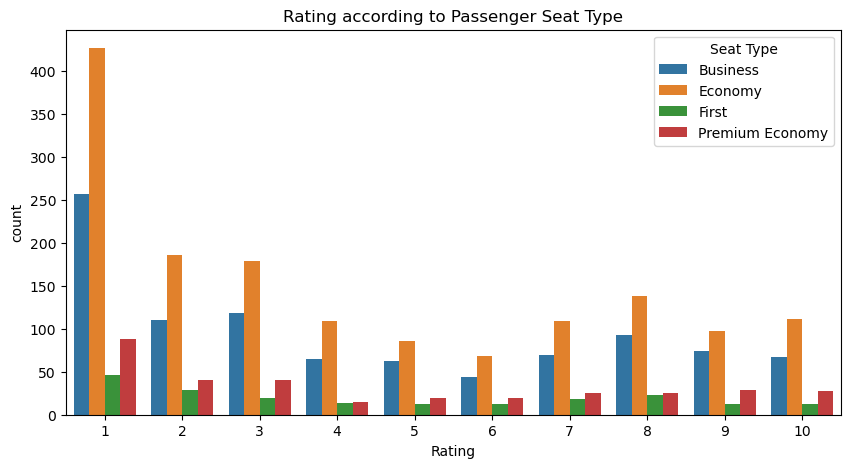

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', hue='Seat Type')
plt.title('Rating according to Passenger Seat Type')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>
<p>Passenger experience or satisfaction varies significantly with seat type, with Economy passengers contributing most to low and high ratings, indicating polarized experiences.</p>

<ul>
<li><b>Rating 1:</b>
The majority of passengers who gave a rating of 1 were seated in the Economy class, followed by Business, Premium Economy, and then First class.</li>
<li><b>Rating 2 to 4:</b>
Economy class consistently dominates in these lower rating categories, though the number of passengers decreases as the rating increases.
Business class is the second most common seat type in these ratings.</li>
<li><b>Rating 5 to 7:</b>
There is a noticeable rise in the number of passengers from all seat types giving these mid-range ratings, especially in Economy and Business classes.</li>
<li><b>Rating 8 to 10:</b>
High ratings (8-10) still see Economy as the leading seat type but with a higher proportion of Business and First class passengers compared to lower ratings.
Premium Economy remains the least common seat type throughout.</li></ul>

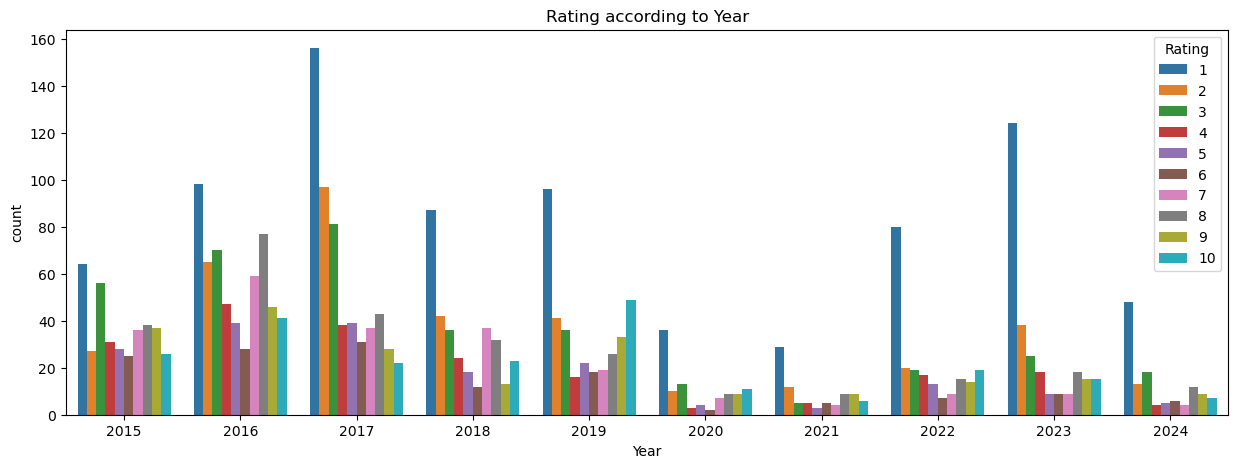

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Year', hue='Rating')
plt.title('Rating according to Year')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
Overall, there is a clear dominance of low ratings (particularly rating 1) throughout the years, with peaks in 2017, 2019, and 2023.</li>
<li>
There is a sharp decline in 2020-2021, which aligns with the travel disruptions caused by the COVID-19 pandemic.</li>
<li>
Despite fluctuations, passenger satisfaction appears consistently polarized, with significantly more lower ratings, especially rating 1, across most years.</li>
</ul>

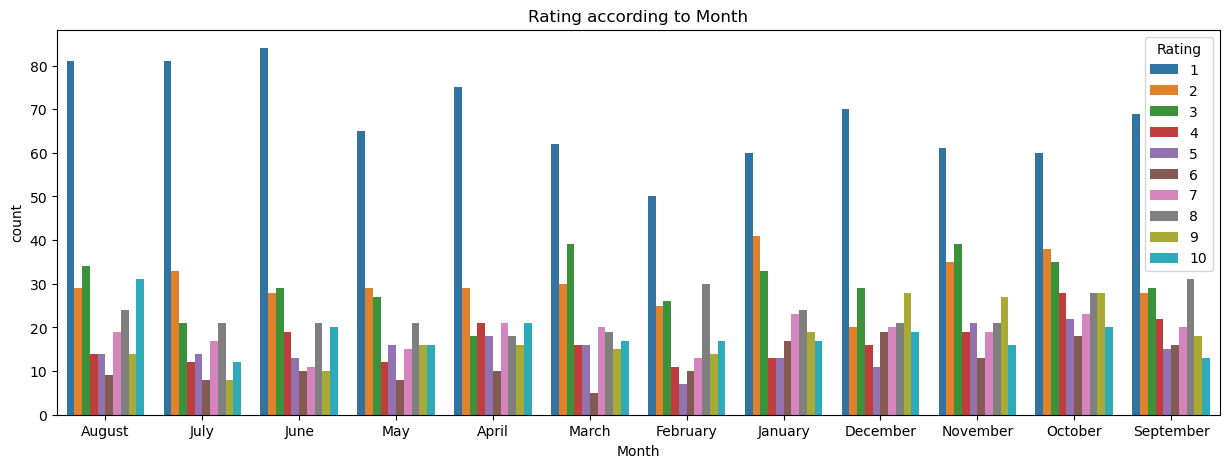

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Month', hue='Rating')
plt.title('Rating according to Month')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
The chart highlights a trend of low passenger satisfaction throughout the year, with rating 1 being the most common score in all months.</li>
<li>
While high ratings do occur, they are much less frequent, indicating a need for improvements in passenger experiences across all months.</li>
<li>
The patterns are consistent, suggesting systemic issues rather than seasonal variations as the primary driver of dissatisfaction.</li>
</ul>

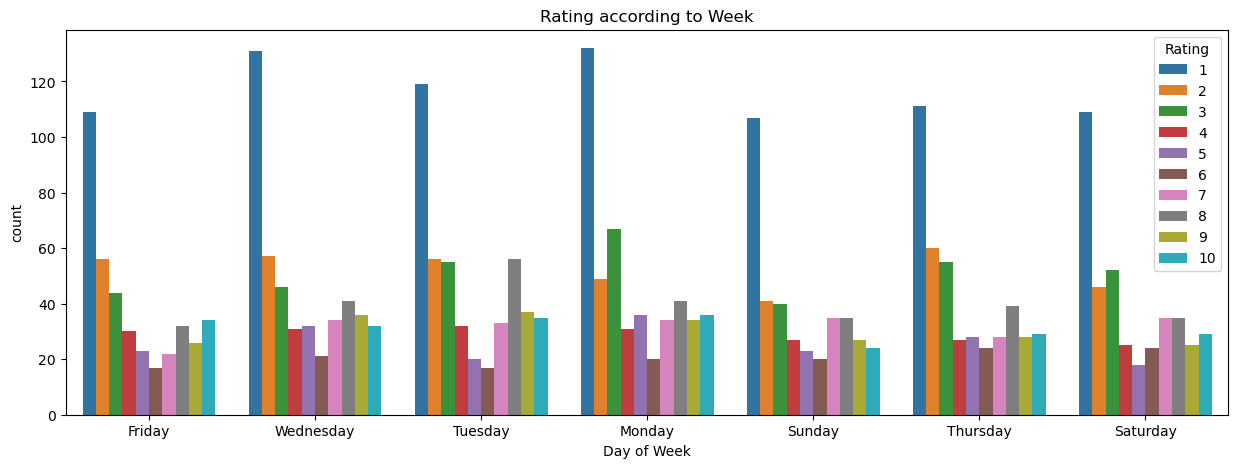

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Day of Week', hue='Rating')
plt.title('Rating according to Week')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
Passenger experiences lead to low ratings, are a common trend across all days of the week, with Wednesday seeing the highest number of reviews.</li>
<li>
The distribution does not vary significantly between days, highlighting a general trend of customer dissatisfaction regardless of the day of travel.</li>
<li>
High ratings, though less common, are present across all days, suggesting varied passenger experiences.</li>
</ul>

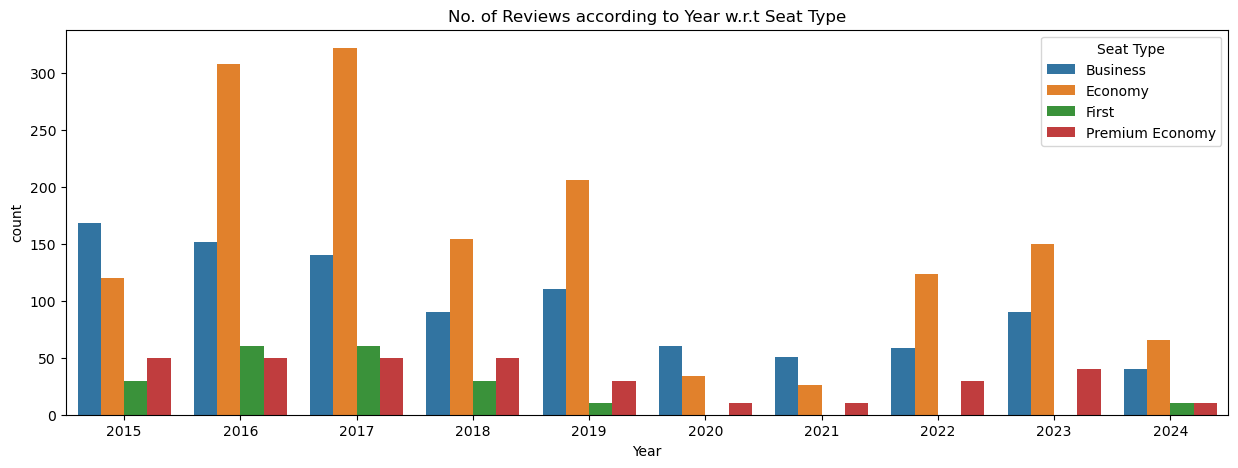

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Year', hue='Seat Type')
plt.title('No. of Reviews according to Year w.r.t Seat Type')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
The peak review periods for all seat types are between 2015 and 2019, particularly for Economy and Business classes.</li>
<li>
There is a visible impact of the pandemic on ratings from 2020 to 2021, with a significant drop in the count for all seat types.</li>
<li>
Economy class remains dominant throughout the period, indicating that it is the most utilized seat type among passengers or receives the most feedback.</li>
<li>
The gradual increase in ratings post-2021 suggests a recovery in passenger reviews, possibly aligning with the resumption of more regular travel patterns.</li></ul>

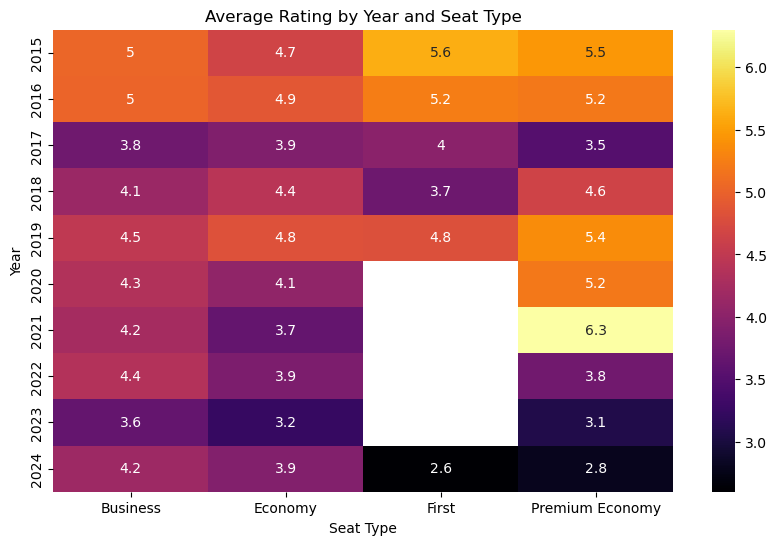

In [17]:
# Heatmap of ratings by seat type and year
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='Year', columns='Seat Type', values='Rating', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='inferno')
plt.title('Average Rating by Year and Seat Type')
plt.show()

<h5><b><u>Interpretation:</b></u></h5>

<ul>
<li>
The heatmap highlights a declining trend in passenger satisfaction across all seat types over the years, with particularly sharp declines in First and Premium Economy in recent years.</li>
<li>
The consistent downward trends suggest systemic issues affecting all classes, while some years show brief improvements, particularly for Premium Economy in 2021.</li>
<li>
The variability and overall decline emphasize a need for service improvements across all seat types to enhance passenger satisfaction.</li>
</ul>

In [14]:
#Sentiment Analysis
def getSentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [15]:
df['Sentiment'] = df['Text'].apply(getSentiment)

In [16]:
df.Sentiment.value_counts()

Sentiment
Positive    1989
Negative     991
Neutral       20
Name: count, dtype: int64

<h4><b>Sentiment Analysis</h4>

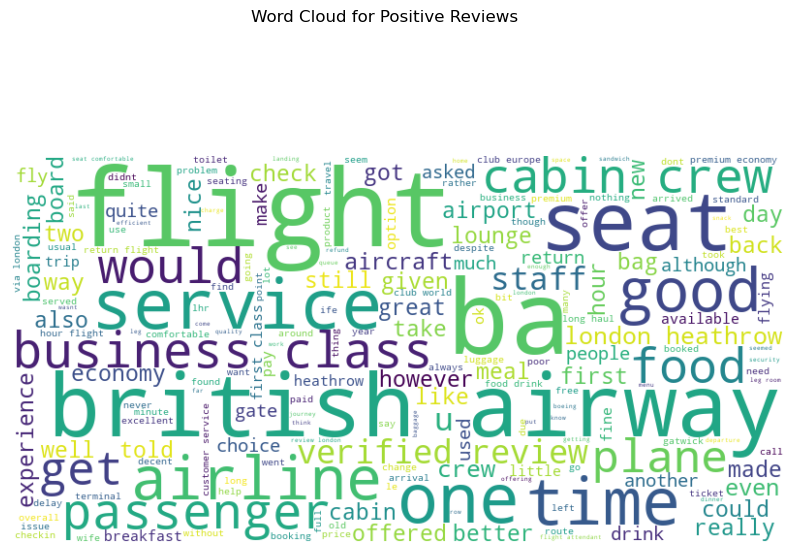

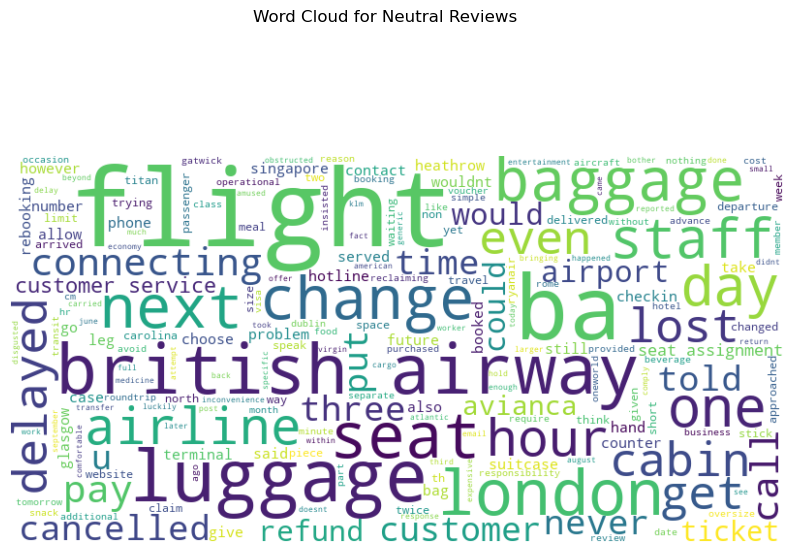

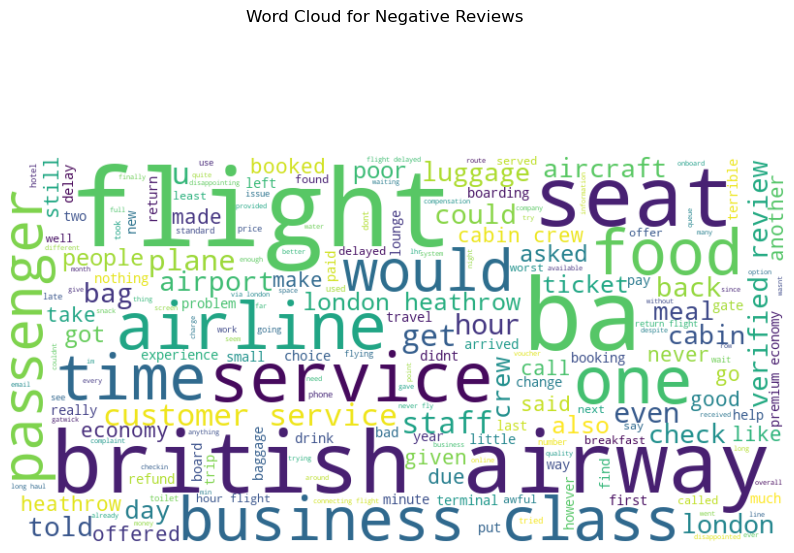

In [18]:
def genWordCloud(sentiment_type, df):
    all_words = ' '.join([text for text in df[df['Sentiment'] == sentiment_type]['Text']])
    stop_words = set(stopwords.words('english')) #Remove additional stopwords
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=110, stopwords=stop_words, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.suptitle(f'Word Cloud for {sentiment_type} Reviews')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    genWordCloud(sentiment, df)